# Kelvin unit: compliance function 
(minimum working example)

***

<center><i>Petr Havlásek (c) 2023-24, petr.havlasek@cvut.cz</i></center>

***


In [1]:
%matplotlib inline

import math
import numpy as np

import matplotlib.pyplot as plt


## Compliance function of a Kelvin unit
**Notation:**

>`E` ... spring stiffness [MPa]<br>

>`eta` ... dashpot viscosity [MPa day]<br>

>`t` ... time of interest [day]<br>

>`tt` ... time of loading [day]<br>

In [2]:
def Kelvin_J_func(E, eta, t, tt):

    tau = eta / E # retardation time

    if t > tt:
        dt = t-tt

        if tau > 0.:
            return 1./ E * ( 1. - math.exp(-(dt)/ tau) )
        else:
            return 1./ E
            
    else:
        return 0.

## Main script and plotting

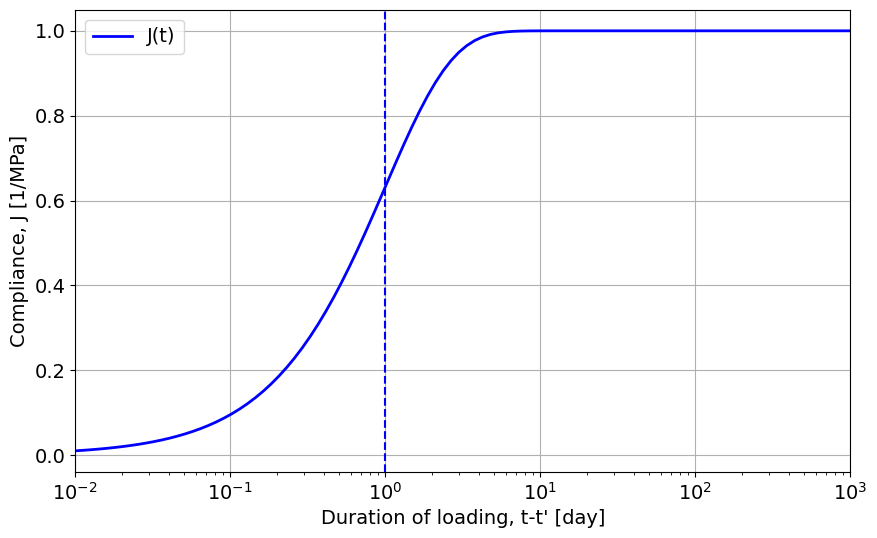

In [3]:
# Definition of parameters
E = 1. # MPa
eta = 1. # day
log_scale = True # scale of the time axis

# definition of time range
log_t_min = -2
log_t_max = 3

if (log_scale):
    times = np.logspace(log_t_min, log_t_max, num = 100 )
else:
    times = np.linspace(0., 10**log_t_max, num = 100 )


# Evaluation of the compliance function 
J = []
for t in times:
    # evaluated for tt = 0, then t corresponds also to the duration of loading
    J.append( Kelvin_J_func(E, eta, t, 0.) )


# Plotting
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})

plt.plot(times, J, lw=2., color="blue", label=r'J(t)')

# vertical line corresponding to characteristic (retardation) time
plt.axvline(x = eta/E, lw=1.5, color="blue", linestyle = "--")

if (log_scale):
    plt.xscale('log')
    plt.xlim([10**log_t_min, 10**log_t_max])
else:
    plt.xlim([0., 10**log_t_max])


plt.grid(True)
plt.legend()
plt.xlabel('Duration of loading, t-t\' [day]')
plt.ylabel('Compliance, J [1/MPa]')

plt.savefig('Kelvin_unit_compliance_function.pdf')

plt.show()
    
#Figure export
